In [56]:
import numpy as np
import pandas as pd

# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers


# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Read Normalised Dataset

In [57]:
train_ = pd.read_csv('./data/normalised.csv')
train = train_.copy()

## Neural Network 

In [58]:
# Create a simple NN 
# Build neural network in Keras
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=11))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [60]:
# lets drop the predictor column
predictors = train.drop(['Dataset', 'Gender'], axis=1)

In [61]:
# Any nan rows are replaced with column mean
predictors.fillna(predictors.mean(), inplace=True)

In [62]:
target = train["Dataset"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20, random_state = 0)
x_train.shape

(466, 11)

In [63]:
model.fit(x_train, y_train, epochs=100, verbose=True)

Epoch 1/100
466/466 [==============================] - 1s 1ms/step - loss: -4.1160 - acc: 0.7253
Epoch 2/100
466/466 [==============================] - 0s 175us/step - loss: -4.1353 - acc: 0.7253
Epoch 3/100
466/466 [==============================] - 0s 166us/step - loss: -4.1491 - acc: 0.7253
Epoch 4/100
466/466 [==============================] - 0s 166us/step - loss: -4.1692 - acc: 0.7253
Epoch 5/100
466/466 [==============================] - 0s 170us/step - loss: -4.1829 - acc: 0.7253
Epoch 6/100
466/466 [==============================] - 0s 166us/step - loss: -4.2003 - acc: 0.7253
Epoch 7/100
466/466 [==============================] - 0s 164us/step - loss: -4.2161 - acc: 0.7253
Epoch 8/100
466/466 [==============================] - 0s 161us/step - loss: -4.2323 - acc: 0.7253
Epoch 9/100
466/466 [==============================] - 0s 162us/step - loss: -4.2462 - acc: 0.7253
Epoch 10/100
466/466 [==============================] - 0s 162us/step - loss: -4.2579 - acc: 0.7253
Epoch 11/10

466/466 [==============================] - 0s 174us/step - loss: -4.3700 - acc: 0.7253
Epoch 84/100
466/466 [==============================] - 0s 172us/step - loss: -4.3705 - acc: 0.7253
Epoch 85/100
466/466 [==============================] - 0s 167us/step - loss: -4.3710 - acc: 0.7253
Epoch 86/100
466/466 [==============================] - 0s 175us/step - loss: -4.3715 - acc: 0.7253
Epoch 87/100
466/466 [==============================] - 0s 164us/step - loss: -4.3719 - acc: 0.7253
Epoch 88/100
466/466 [==============================] - 0s 168us/step - loss: -4.3724 - acc: 0.7253
Epoch 89/100
466/466 [==============================] - 0s 165us/step - loss: -4.3727 - acc: 0.7253
Epoch 90/100
466/466 [==============================] - 0s 167us/step - loss: -4.3732 - acc: 0.7253
Epoch 91/100
466/466 [==============================] - 0s 162us/step - loss: -4.3735 - acc: 0.7253
Epoch 92/100
466/466 [==============================] - 0s 166us/step - loss: -4.3743 - acc: 0.7253
Epoch 93/100


In [64]:
y_pred = model.predict(x_test)

In [65]:
# Results - Accuracy
scores = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


Training Accuracy: 72.53%

Testing Accuracy: 66.67%



## Confusion Matrix

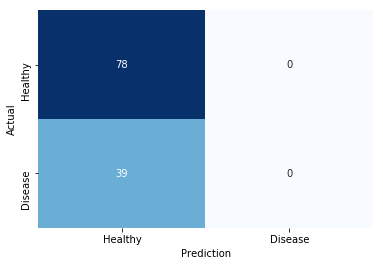

<Figure size 432x288 with 0 Axes>

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
y_test_pred = model.predict_classes(x_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Healthy', 'Disease'], yticklabels=['Healthy', 'Disease'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()